# Library

In [1]:
import os
os.getcwd()

'C:\\Users\\mahos\\Program'

In [2]:
import cv2
import pandas as pd
import imageio
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import filters
from skimage import util
from skimage import img_as_ubyte
from skimage import exposure
from math import log10, sqrt

In [3]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    
    print(f"PSNR value is {psnr} dB")
    return psnr

In [4]:
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

# Read Image

1000


Text(0, 0.5, 'Y Shape')

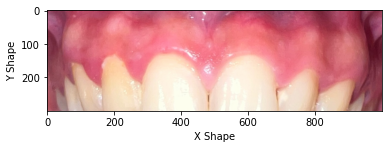

In [5]:
img = cv2.imread(r"D:\Download\Data Crop\Klasifikasi Dengan DOPI\Dopi 0 (2).jpg")
img = cv2.resize(img, (1000,300))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print (img.shape[1])
plt.imshow(img)
plt.xlabel("X Shape")
plt.ylabel("Y Shape")

Text(0, 0.5, 'Y Shape')

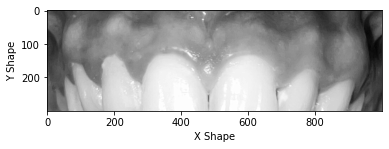

In [6]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray.shape
plt.imshow(img_gray, cmap = 'gray')
plt.xlabel("X Shape")
plt.ylabel("Y Shape")

In [7]:
img_gray.shape

(300, 1000)

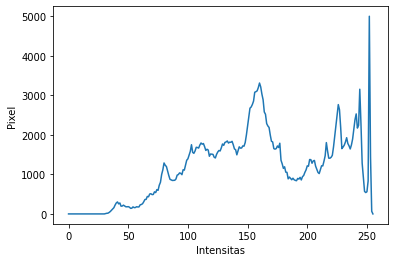

In [8]:
hist=ndi.histogram(img_gray, min=0, max=255, bins=256)
plt.xlabel("Intensitas")
plt.ylabel("Pixel")
plt.plot(hist)
plt.show()


26.603583687494208
29.0
242.0


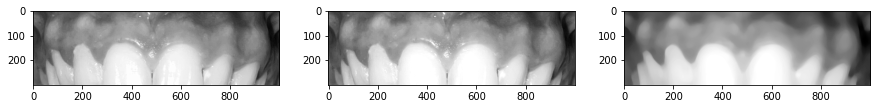

In [9]:
p2 = np.percentile(img_gray, 0)
p98 = np.percentile(img_gray, 93)
img_rescale = exposure.rescale_intensity(img_gray, in_range=(p2, p98))

im_filt1=ndi.median_filter(img_rescale, size=30)

print (calculate_psnr(img_gray,im_filt1))
print (p2)
print (p98)

fig, ax = plt.subplots(ncols=3, figsize=(15, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(img_rescale, cmap='gray')
ax[2].imshow(im_filt1, cmap='gray')

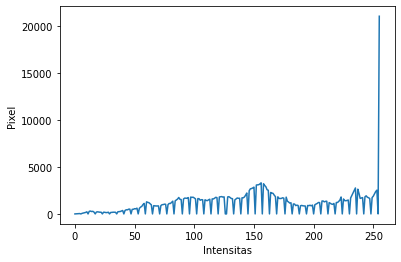

In [10]:
hist=ndi.histogram(img_rescale, min=1, max=255, bins=256)
plt.xlabel("Intensitas")
plt.ylabel("Pixel")
plt.plot(hist)
plt.show()

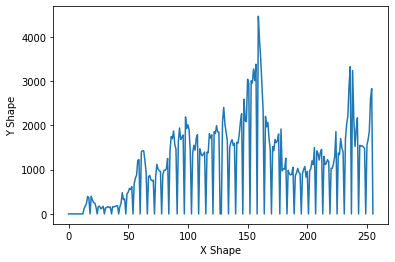

In [11]:
hist=ndi.histogram(im_filt1, min=0, max=254, bins=256)
plt.xlabel("X Shape")
plt.ylabel("Y Shape")
plt.plot(hist)
plt.show()

# Global Treshold

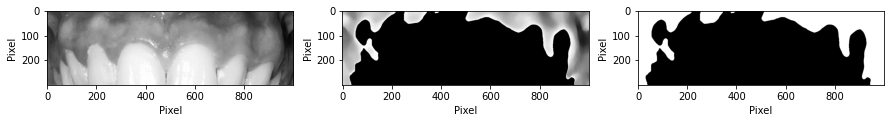

In [12]:
ret, thresh = cv2.threshold(im_filt1,120,255,cv2.THRESH_TOZERO_INV)
ret, thresh1 = cv2.threshold(im_filt1,120,255,cv2.THRESH_BINARY_INV)


fig, ax = plt.subplots(ncols=3, figsize=(15, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(thresh, cmap='gray')
ax[2].imshow(thresh1, cmap='gray')

for ax in ax:
    ax.set_xlabel('Pixel')
    ax.set_ylabel('Pixel')

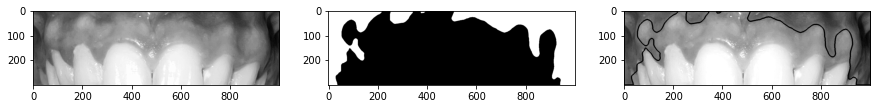

In [13]:
contours, heirarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
contours1, heirarchy = cv2.findContours(thresh1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

largest_areas = sorted(contours, key=cv2.contourArea)
largest_areas1 =contours1


mask = np.zeros(img_rescale.shape, np.uint8)
mask1 = np.zeros(img_rescale.shape, np.uint8)

for i in range (len(largest_areas)):
    img_contour = cv2.drawContours(mask,[largest_areas[-(i)]],0,(255,255,255,255),-1)
    
img_contour1 = cv2.drawContours(mask1,largest_areas1,-1,(255,255,255),-1)
img_contour2 = cv2.drawContours(img_rescale,contours1,-1,(0,255,0),3)

fig, ax = plt.subplots(ncols=3, figsize=(15, 10))
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(img_contour1, cmap='gray')
ax[2].imshow(img_contour2, cmap='gray')

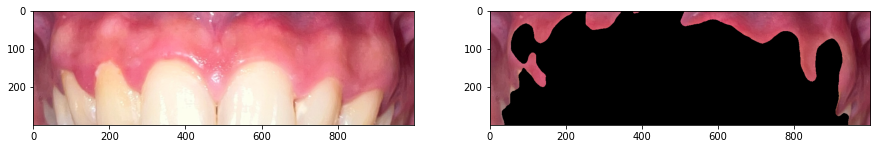

In [14]:
img_bitcontour = cv2.bitwise_or(img,img,mask=img_contour)
img_bitcontour1 = cv2.bitwise_or(img,img,mask=img_contour1)

fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_bitcontour1, cmap='gray')

In [15]:
PSNR(img,img_bitcontour1)
img_bitcontour1.shape

PSNR value is 29.964956436014706 dB


(300, 1000, 3)

In [16]:
import cv2
import numpy
myimg = img_bitcontour
avg_color_per_row = numpy.mean(myimg, axis=0)
avg_color = numpy.mean(avg_color_per_row, axis=0)
Green = avg_color [1]
Blue = avg_color [2]
Red = avg_color [0]

print ('Avg_R=',Red, '\nAvg G=',Green, '\nAvg B=',Blue)

Avg_R= 46.30241000000007 
Avg G= 19.899240000000006 
Avg B= 25.28694333333334


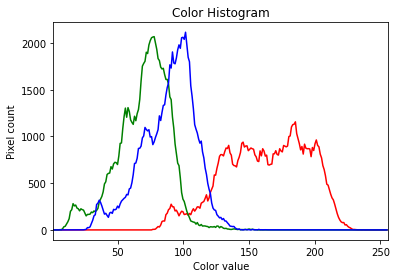

In [17]:
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

plt.figure()
plt.xlim([1, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img_bitcontour[:, :, channel_id], bins=256, range=(1, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")


plt.show()

In [18]:
pixels = cv2.countNonZero(thresh1)
image_area = thresh.shape[0] * thresh.shape[1]
area_ratio = (pixels / image_area) * 100 

print('Pixels =',pixels)
print('Area Image =',image_area)
print('Area Segmentation =',area_ratio)

Pixels = 85261
Area Image = 300000
Area Segmentation = 28.420333333333332


In [19]:
labels, nlabels = ndi.label(img_contour1)

label_arrays = []
#for label_num in range(1, nlabels+1):  
    
  #  label_mask = np.where(labels == label_num, 1, 0)
 #   label_arrays.append(image_segmented)

print('There are {} separate components / objects detected.'.format(nlabels))

There are 4 separate components / objects detected.


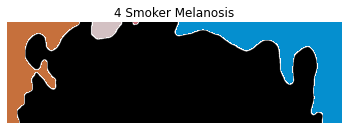

In [20]:
# Create a random colormap
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))

labels_for_display = np.where(labels > 0, labels, np.nan)
plt.imshow(img_contour1, cmap='gray')
plt.imshow(labels_for_display, cmap=rand_cmap)
plt.axis('off')
plt.title('{} Smoker Melanosis'.format(nlabels))
plt.show()

In [21]:
boxes = ndi.find_objects(labels)
for label_ind, label_coords in enumerate(boxes):
    cell = img_contour1[label_coords]

# Regenerate the labels
labels, nlabels = ndi.label(img_contour1)
print('There are now {} separate components / objects detected.'.format(nlabels))

There are now 4 separate components / objects detected.


In [22]:
import math
import pandas as pd
from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

image = img_contour1

label_img = label(image)
regions = regionprops(label_img)
label_img

array([[1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       ...,
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4]], dtype=int64)

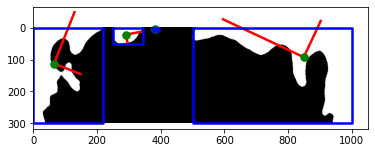

In [23]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.minor_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.major_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.major_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)
plt.show()

In [24]:
props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'major_axis_length',
                                                 'minor_axis_length'))

In [25]:
df1=pd.DataFrame(props)
df1.to_excel(r'D:\Download\Data Crop\export_Data Frame Smoker Melanosis Meluas.xlsx',
             sheet_name='Sheet_name_1')  
df1

,centroid-0,centroid-1,orientation,major_axis_length,minor_axis_length
0,112.628605,65.456489,-0.378350,346.952778,178.035206
1,21.985392,290.839044,-1.381778,94.210188,53.646724
2,3.323529,383.125000,-1.465562,19.780138,9.184271
3,92.593769,848.810663,1.132188,559.223828,250.650089
